## GDP forecast based on noctilucent remote Sensing 

In [1]:
# https://www.kaggle.com/code/omkaramilkanthwar/gdp-by-satellite-images
# https://www.kaggle.com/code/fbruckschen/spatial-poverty-breakdown-using-nightlights/notebook
# https://www.kaggle.com/code/kerneler/starter-country-nightlight-dataset-6050e55d-a
# Wu, Y., Shi, K*., Chen, Z., Liu, S., Chang, Z. 2021. Developing time-series of improved DMSP-OLS-like data (1992-2019) in China by integrating DMSP-OLS and SNPP-VIIRS. IEEE Transactions on Geoscience and Remote Sensing 10.1109/TGRS.2021.3135333
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import os
from matplotlib.pyplot import imshow
import cv2

### About Dataset
#### Context
Version 4 DMSP-OLS Nighttime Lights Time Series
The files are cloud-free composites made using all the available archived DMSP-OLS smooth resolution data for calendar years. In cases where two satellites were collecting data - two composites were produced. The products are 30 arc second grids, spanning -180 to 180 degrees longitude and -65 to 75 degrees latitude.

#### Content
Dataset has two parts

Night light Images
GDP numbers
Night light images-
The original composite from Earth Observation Group has been segmented to extract out specific countries using shapefiles.
List of countries (ISO) -> ["IND" , "CHN" , "BGD" ,"DEU" , "GBR" , "JPN" , "RUS" , "AUS" , "BRA" , "MEX"]

Data augmentation has been applied such that for each (country and year) pair there are 20 images.

Each file is named as follows

[COUNTRYCODE][YEAR].png[RANDOMNUMERS].jpeg

Take note that these are JPEG files not PNG

GDP numbers-
The dataset also contains the gdp data file which has been downloaded from the IMF

### Acknowledgements
Original source - "Earth Observation Group, Colorado School of Mines".
References:
Elvidge, C. D., Baugh, K. E., Kihn, E. A., Kroehl, H. W., & Davis, E. R. (1997). Mapping city lights with nighttime data from the DMSP Operational Linescan System. Photogrammetric Engineering and Remote Sensing, 63(6), 727-734.

In [2]:
root_path = "./dataset/"

In [3]:
mex_impaths = [f for f in os.listdir(root_path)]
data = []
for m in mex_impaths:
    country , year  = m.split(".")[0].split("_")
    data.append((country,year,m))

In [ ]:
# code :country name abbreviation

In [4]:
img_df = pd.DataFrame(data , columns=["code" , "year" , "path"])
img_df.head()

,code,year,path
0,AUS,2007,AUS_2007.png_0_7577.jpeg
1,MEX,2003,MEX_2003.png_0_8298.jpeg
2,BGD,1993,BGD_1993.png_0_358.jpeg
3,BGD,1996,BGD_1996.png_0_9371.jpeg
4,BRA,2009,BRA_2009.png_0_7617.jpeg


In [5]:
gdp = pd.read_csv("./gdp_melted.csv")

In [6]:
gdp["year"] = gdp["year"].astype(int)
img_df["year"] = img_df["year"].astype(int)

In [7]:
merged_df = pd.merge(img_df, gdp , on=["code" , "year"])
merged_df.head()

,code,year,path,Unnamed: 0,country,indicator,indicator_code,gdp
0,AUS,2007,AUS_2007.png_0_7577.jpeg,12419,Australia,GDP (current US$),NY.GDP.MKTP.CD,8.531000e+11
1,AUS,2007,AUS_2007.png_0_2740.jpeg,12419,Australia,GDP (current US$),NY.GDP.MKTP.CD,8.531000e+11
2,AUS,2007,AUS_2007.png_0_3357.jpeg,12419,Australia,GDP (current US$),NY.GDP.MKTP.CD,8.531000e+11
3,AUS,2007,AUS_2007.png_0_6165.jpeg,12419,Australia,GDP (current US$),NY.GDP.MKTP.CD,8.531000e+11
4,AUS,2007,AUS_2007.png_0_4675.jpeg,12419,Australia,GDP (current US$),NY.GDP.MKTP.CD,8.531000e+11


In [8]:
df = merged_df.dropna()

In [9]:
df = df.sample(frac=1)

In [ ]:
imgs = []
for j, row in enumerate(df.iterrows()):
    img = cv2.imread(root_path + row[1]["path"], 0)
    img = cv2.resize(img, (256,256))
    img = img.reshape((256,256,1))
    imgs.append(img)
    if j%100 == 0:
        print(j)
    if(j == 1000):
        break

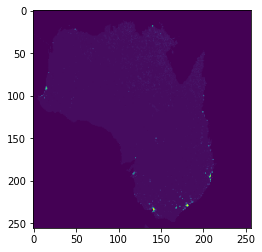

In [11]:
imshow(imgs[100])

In [37]:
eq = []
for img in imgs[:]:
    equ = cv2.equalizeHist(img[:,:,0])
    eq.append(equ.reshape((256,256,1)))

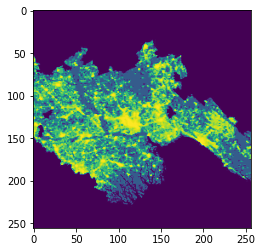

In [40]:
imshow(eq[500])

## Creating convolutional neural network based on keras

In [59]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.models import Sequential

In [71]:
model = Sequential()
model.add(Conv2D(32, 5, input_shape=(256,256,1), activation = 'relu'))
model.add(MaxPooling2D(4))
model.add(Conv2D(64, 3, activation = 'relu'))
model.add(MaxPooling2D(4))
model.add(Conv2D(64, 2, activation = 'relu'))
model.add(MaxPooling2D(4))
model.add(Conv2D(128, 2, activation = 'relu'))
model.add(Flatten())
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))


In [72]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 252, 252, 32)      832       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 14, 14, 64)        16448     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 2, 2, 128)        

## Evaluation

In [73]:
model.compile('adam', 'mse', ['mae'])

In [74]:
imgs = np.array(eq)
y = np.array(df['gdp'])
y = y[:1001].reshape((1001, 1))
translation = y.min()
y = y-y.min()
scale = y.max()
y = y/y.max()
print(imgs.shape, y.shape)


(1001, 256, 256, 1) (1001, 1)


In [75]:
history = model.fit(imgs, y, validation_split = 0.1, epochs = 50)

Epoch 1/50
29/29 [==============================] - 2s 42ms/step - loss: 374.4833 - mae: 10.6924 - val_loss: 0.1081 - val_mae: 0.2782
Epoch 2/50
29/29 [==============================] - 1s 36ms/step - loss: 0.0705 - mae: 0.2076 - val_loss: 0.0322 - val_mae: 0.1176
Epoch 3/50
29/29 [==============================] - 1s 36ms/step - loss: 0.0336 - mae: 0.1368 - val_loss: 0.0286 - val_mae: 0.1229
Epoch 4/50
29/29 [==============================] - 1s 36ms/step - loss: 0.0241 - mae: 0.1110 - val_loss: 0.0251 - val_mae: 0.1131
Epoch 5/50
29/29 [==============================] - 1s 37ms/step - loss: 0.0221 - mae: 0.1060 - val_loss: 0.0206 - val_mae: 0.0958
Epoch 6/50
29/29 [==============================] - 1s 36ms/step - loss: 0.0206 - mae: 0.0983 - val_loss: 0.0183 - val_mae: 0.0878
Epoch 7/50
29/29 [==============================] - 1s 36ms/step - loss: 0.0170 - mae: 0.0906 - val_loss: 0.0181 - val_mae: 0.0836
Epoch 8/50
29/29 [==============================] - 1s 37ms/step - loss: 0.0134 

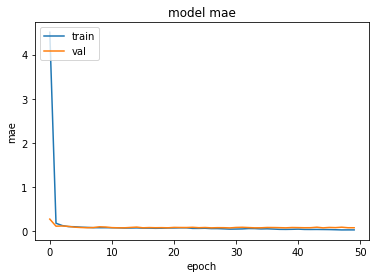

In [79]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [82]:
plt.savefig("maevsepoch.jpg")

<Figure size 432x288 with 0 Axes>

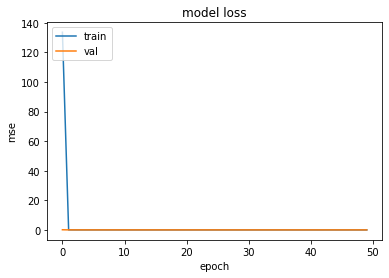

In [83]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [85]:
plt.savefig("msevsepoch.jpg")

<Figure size 432x288 with 0 Axes>

## Show the error between some predicted data and actual data

In [88]:
idx = [10,100,500,125,562,852,522,578,456]
for idd in idx:
    y_true = y[idd]*scale + translation
    y_pred = model.predict(imgs[idd:idd+1])
    y_pred = y_pred*scale + translation
    print("Actual: {} Predicted: {}".format(y_true, y_pred))

Actual: [8.20382e+11] Predicted: [[9.22076e+11]]
Actual: [3.78376e+11] Predicted: [[2.0208222e+11]]
Actual: [5.39912898e+10] Predicted: [[-1.3789741e+11]]
Actual: [6.1249e+11] Predicted: [[4.590967e+11]]
Actual: [3.31665194e+10] Predicted: [[5.3299243e+11]]
Actual: [1.95535e+12] Predicted: [[2.4436765e+12]]
Actual: [5.23138e+12] Predicted: [[5.189718e+12]]
Actual: [1.0527e+12] Predicted: [[7.042346e+11]]
Actual: [6.00233e+11] Predicted: [[6.884832e+11]]
